<a href="https://colab.research.google.com/github/lak-sh-man/EDA-on-IPL/blob/main/sports_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sports Exploratory Data Analysis

## 1. Connect the data in Drive to Colab

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive"

'ALL FILES'  'Colab Notebooks'	'LAKSHMAN '


## 2. Data Preparation and Cleaning


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import plotly.tools as tls
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore")

In [ ]:
matches_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sports/matches.csv", encoding="latin1")
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
deliveries_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sports/deliveries.csv", encoding="latin1")
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
print(deliveries_data.columns)
print(matches_data.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [ ]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
deliveries_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
matches_data.drop(['umpire3'],axis=1,inplace=True) 

In [ ]:
deliveries_data.fillna(0,inplace=True)

In [ ]:
matches_data.shape

(756, 17)

In [ ]:
matches_data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [ ]:
matches_data.shape[0]

756

In [ ]:
matches_data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
print(matches_data['city'].nunique())
matches_data['city'].unique()

32


array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [ ]:
print(matches_data['umpire1'].nunique())
matches_data['umpire1'].unique()

61


array(['AY Dandekar', 'A Nand Kishore', 'Nitin Menon', 'AK Chaudhary',
       nan, 'A Deshmukh', 'KN Ananthapadmanabhan', 'YC Barde', 'S Ravi',
       'CB Gaffaney', 'M Erasmus', 'NJ Llong', 'CK Nandan', 'Asad Rauf',
       'MR Benson', 'Aleem Dar', 'SJ Davis', 'BF Bowden', 'IL Howell',
       'DJ Harper', 'RE Koertzen', 'BR Doctrove', 'AV Jayaprakash',
       'BG Jerling', 'HDPK Dharmasena', 'S Asnani', 'GAV Baxter',
       'SS Hazare', 'K Hariharan', 'SL Shastri', 'SK Tarapore',
       'SJA Taufel', 'S Das', 'AM Saheba', 'PR Reiffel', 'JD Cloete',
       'VA Kulkarni', 'BNJ Oxenford', 'C Shamshuddin', 'RK Illingworth',
       'RM Deshpande', 'K Srinath', 'SD Fry', 'PG Pathak', 'K Bharatan',
       'Chris Gaffaney', 'Rod Tucker', 'Nigel Llong', 'Anil Chaudhary',
       'K Ananthapadmanabhan', 'O Nandan', 'A Nanda Kishore',
       'Vineet Kulkarni', 'Bruce Oxenford', 'Marais Erasmus',
       'Kumar Dharmasena', 'Anil Dandekar', 'Yeshwant Barde', 'Ian Gould',
       'Ulhas Gandhe', 'Nan

In [ ]:
print(matches_data.iloc[matches_data['win_by_runs'].idxmax()]['winner'])
print('Maximum Runs:'+ str(matches_data.iloc[matches_data['win_by_runs'].idxmax()]['win_by_runs']))

Mumbai Indians
Maximum Runs:146


In [ ]:
print(matches_data.iloc[matches_data['win_by_wickets'].idxmax()]['winner'])
print('Maximum Wickets:'+ str(matches_data.iloc[matches_data['win_by_wickets'].idxmax()]['win_by_wickets']))

Kolkata Knight Riders
Maximum Wickets:10


In [ ]:
print(matches_data.iloc[matches_data[matches_data['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner'])
print('Minimum Runs:'+ str(matches_data.iloc[matches_data[matches_data['win_by_runs'].ge(1)].win_by_runs.idxmin()]['win_by_runs']))

Mumbai Indians
Minimum Runs:1


In [ ]:
print(matches_data.iloc[matches_data[matches_data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner'])
print('Minimum Wickets:'+ str(matches_data.iloc[matches_data[matches_data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['win_by_wickets']))

Kolkata Knight Riders
Minimum Wickets:1


In [ ]:
matches_data['player_of_match'].value_counts().idxmax()

'CH Gayle'

In [ ]:
matches_data['winner'].value_counts().idxmax()

'Mumbai Indians'

In [ ]:
print('Winners By Years:')
for i in range(2008,2020):
    df=((matches_data[matches_data['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

Winners By Years:
[2008 'Rajasthan Royals']
[2009 'Deccan Chargers']
[2010 'Chennai Super Kings']
[2011 'Chennai Super Kings']
[2012 'Kolkata Knight Riders']
[2013 'Mumbai Indians']
[2014 'Kolkata Knight Riders']
[2015 'Mumbai Indians']
[2016 'Sunrisers Hyderabad']
[2017 'Mumbai Indians']
[2018 'Chennai Super Kings']
[2019 'Mumbai Indians']


## 3. Exploratory analysis & Visualisation 

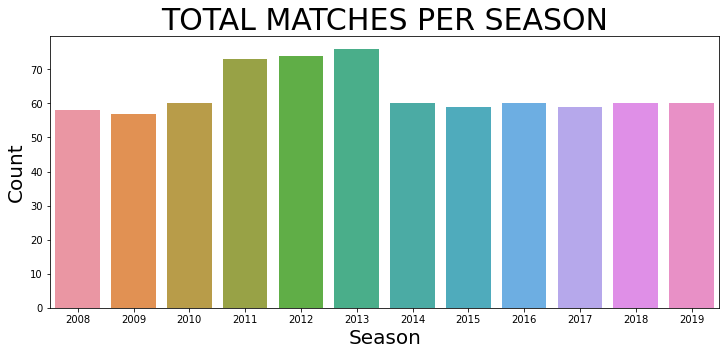

In [70]:
plt.figure(figsize=(12,5))
sns.countplot(x='season', data=matches_data)
plt.xticks(rotation = 0)
plt.xlabel('Season',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('TOTAL MATCHES PER SEASON',fontsize=30)
plt.show()

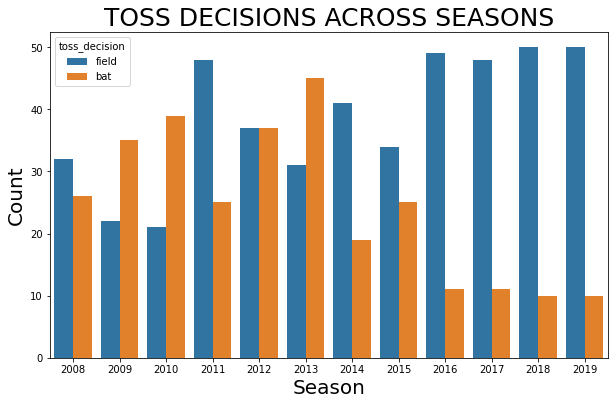

In [71]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches_data)
plt.xticks(rotation = 0)
plt.xlabel('Season',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('TOSS DECISIONS ACROSS SEASONS',fontsize=25)
plt.show()

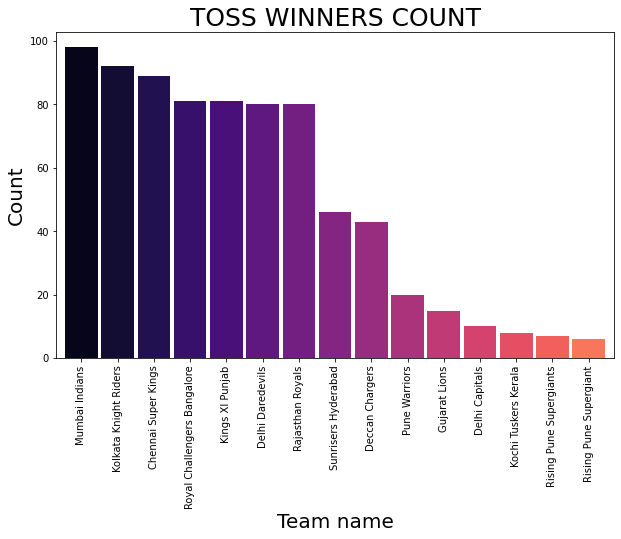

In [102]:
plt.subplots(figsize=(10,6))
ax=matches_data['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('magma',20))
plt.xlabel('Team name',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('TOSS WINNERS COUNT',fontsize=25)
plt.show()

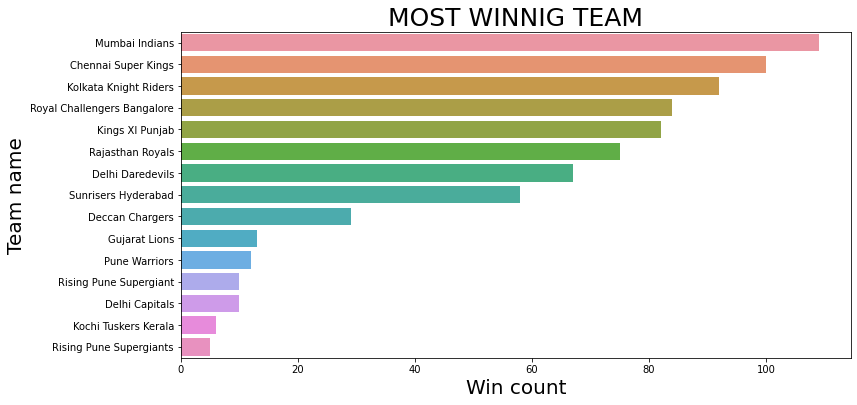

In [62]:
plt.figure(figsize=(12,6))
data = matches_data.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.xlabel('Win count',fontsize=20)
plt.ylabel('Team name',fontsize=20)
plt.title('MOST WINNIG TEAM',fontsize=25)
plt.show()

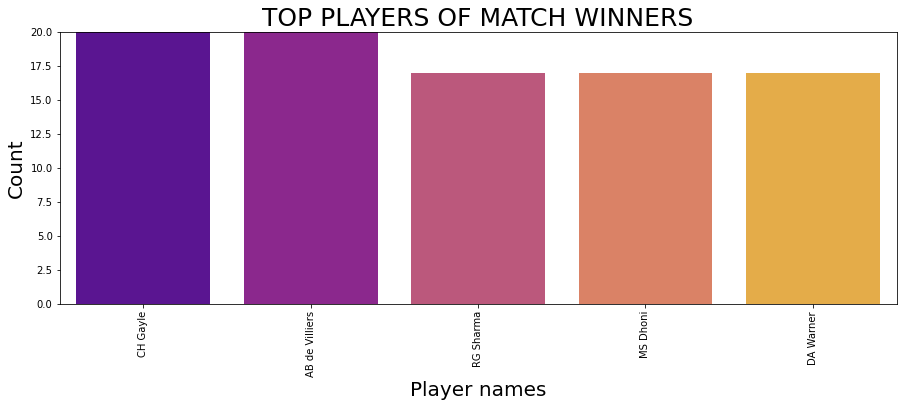

In [94]:
top_players = matches_data.player_of_match.value_counts()[:5]
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim([0,20])
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="plasma");
plt.xlabel('Player names',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('TOP PLAYERS OF MATCH WINNERS',fontsize=25)
plt.show()

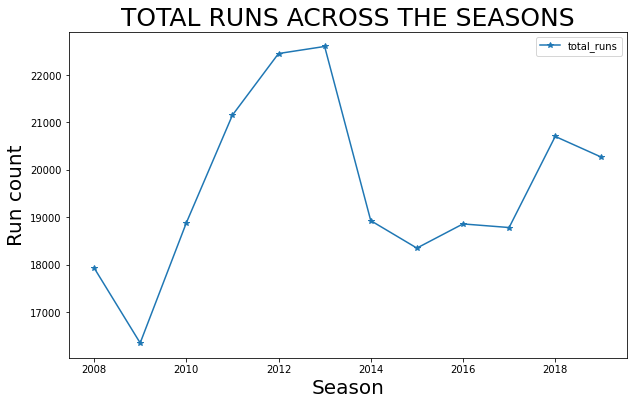

In [64]:
batsmen = matches_data[['id','season']].merge(deliveries_data, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='*')
plt.gcf().set_size_inches(10,6)
plt.xlabel('Season',fontsize=20)
plt.ylabel('Run count',fontsize=20)
plt.title('TOTAL RUNS ACROSS THE SEASONS',fontsize=25)
plt.show()

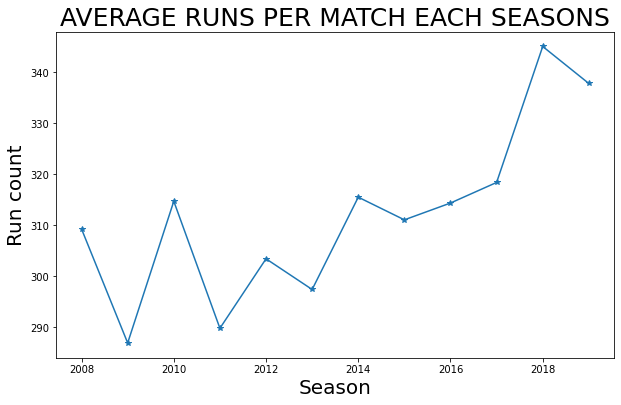

In [69]:
Average_each_season=matches_data.groupby(['season']).count().id.reset_index()
Average_each_season.rename(columns={'id':'matches'},inplace=1)
Average_each_season['total_runs']=season['total_runs']
Average_each_season['average_runs_per_match']=Average_each_season['total_runs']/Average_each_season['matches']
Average_each_season.set_index('season')['average_runs_per_match'].plot(marker='*')
plt.gcf().set_size_inches(10,6)
plt.xticks(rotation = 0)
plt.xlabel('Season',fontsize=20)
plt.ylabel('Run count',fontsize=20)
plt.title('AVERAGE RUNS PER MATCH EACH SEASONS',fontsize=25)
plt.show()

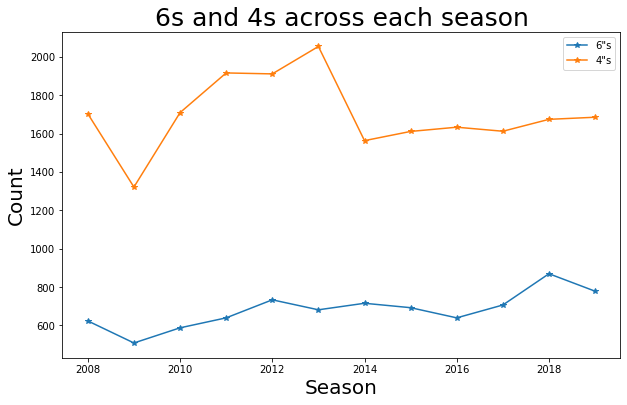

In [74]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=q.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='*')
figure=plt.gcf()
figure.set_size_inches(10,6)
plt.xticks(rotation = 0)
plt.xlabel('Season',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('6s and 4s across each season',fontsize=25)
plt.show()

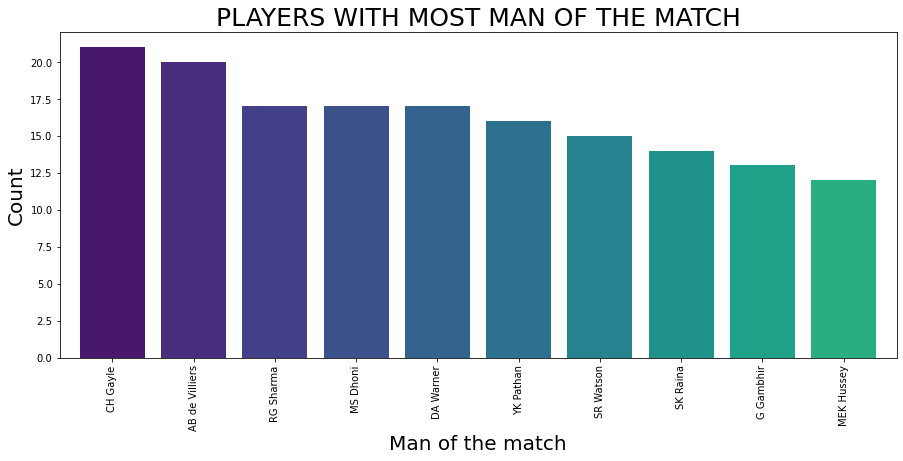

In [95]:
plt.subplots(figsize=(15,6))
ax = matches_data['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('viridis',15))   
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
plt.xticks(rotation = 90)
plt.xlabel('Man of the match',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('PLAYERS WITH MOST MAN OF THE MATCH',fontsize=25)
plt.show()

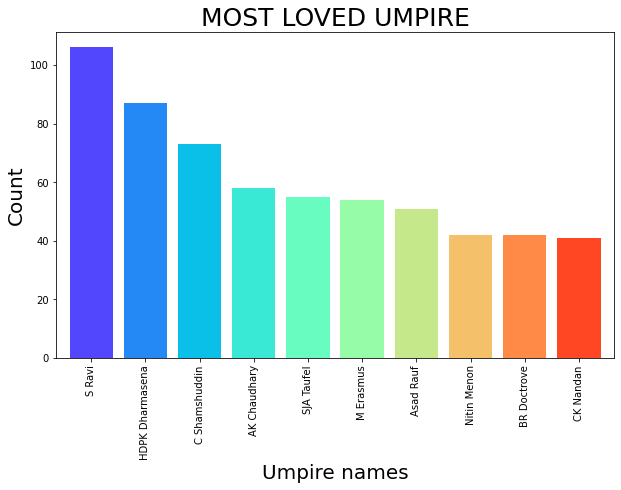

In [96]:
plt.subplots(figsize=(10,6))
umpire=pd.concat([matches_data['umpire1'],matches_data['umpire2']]) 
ax=umpire.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('rainbow',10))
plt.xticks(rotation = 90)
plt.xlabel('Umpire names',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('MOST LOVED UMPIRE',fontsize=25)
plt.show()

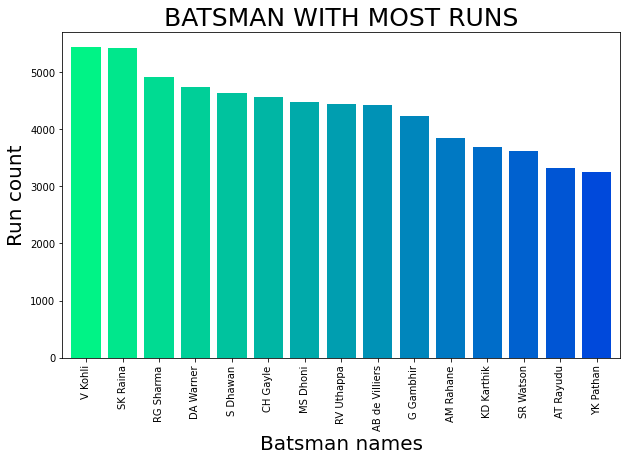

In [99]:
plt.subplots(figsize=(10,6))
max_runs=deliveries_data.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:15].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
plt.xticks(rotation = 90)
plt.xlabel('Batsman names',fontsize=20)
plt.ylabel('Run count',fontsize=20)
plt.title('BATSMAN WITH MOST RUNS',fontsize=25)
plt.show()

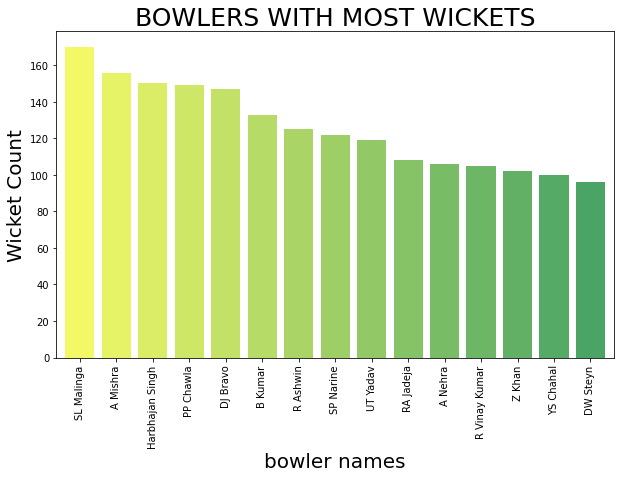

In [101]:
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=deliveries_data[deliveries_data["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:15].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
plt.xticks(rotation = 90)
plt.xlabel('bowler names',fontsize=20)
plt.ylabel('Wicket Count',fontsize=20)
plt.title('BOWLERS WITH MOST WICKETS',fontsize=25)
plt.show()


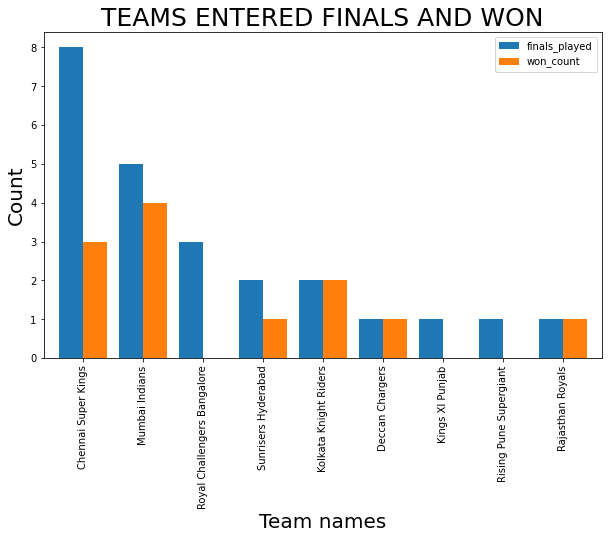

In [100]:
finals=matches_data.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.plot.bar(width=0.8)
plt.gcf().set_size_inches(10,6)
plt.xticks(rotation = 90)
plt.xlabel('Team names',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('TEAMS ENTERED FINALS AND WON',fontsize=25)
plt.show()

## 4. Summary and Conclusion

Insights :

- 2013 has the most number of matches over 70
- 2018 & 2019 have almost same count of toss decisions for fielding & batting
- Mumbai Indians won toss more than 90 times which is more than any other teams
- Mumbai Indians won matches than anyother teams at the count of 120
- CH Gayle is the player with most man of the matches
- S Ravi is the most loved umpire
- V Kholi & Raina are the batsmans with most scored runs over 5000
- Malinga is the bowler with most wickets over 160
- Chennai Super Kings entered the finals for 8 times and won 3 times
- Mumbai Indians entered the finals for 5 times and won 4 times
